In [1]:

import pandas as pd
from datetime import date
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [24]:
# read data from file
data = pd.read_excel("C://Users//I539001//Desktop//DHBW//2. Semester//Data Visualization//Portfolioprüfung//source_code//data//data.xlsx")
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,open quantity,Delivery deviation in days,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Unnamed: 34,Unnamed: 35
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,3,NaN,NaN,3,under-delivery,6720.0,EUR,1,NaN,NaN
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,3,NaN,NaN,3,under-delivery,18162.0,EUR,1,NaN,NaN
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,3,NaN,NaN,3,under-delivery,5710.0,EUR,1,NaN,NaN
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,3,NaN,NaN,3,under-delivery,29890.0,EUR,1,NaN,NaN
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,3,NaN,NaN,3,under-delivery,9646.0,EUR,1,NaN,NaN


# Datenanpassungen

In [25]:
#dropping some columns since unnecessaary 
data.drop("Unnamed: 34", inplace=True, axis = 1) 
data.drop("Unnamed: 35", inplace=True, axis = 1) 
data.drop("Delivery deviation  in days", inplace=True, axis = 1)

In [26]:
data["Delivery deviation in days"] = data["delivery date"] - data["supplier delivery date"]

In [27]:
data["Delivery deviation in days"] = data["Delivery deviation in days"].apply(lambda x: float(x.days))

In [28]:
conditions = [(data['Delivery deviation in days'] <= 0),
              (data['Delivery deviation in days'] >= 1) & (data['Delivery deviation in days'] <= 4),
              (data['Delivery deviation in days'] >= 5) & (data['Delivery deviation in days'] <= 10),
              (data['Delivery deviation in days'] > 10)]

In [29]:
values = ['in time', 'late: < 5 days', 'late: 5 to 10 days', 'late: > 10 days']

In [30]:
data['deviation indicator'] = np.select(conditions, values)

In [33]:
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.0,EUR,1,0.0
1,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.0,EUR,1,0.0
2,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.0,EUR,1,0.0
3,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.0,EUR,1,0.0
4,2019-02-28,NaN,NaN,NaN,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.0,EUR,1,0.0


In [34]:
data['Year'] = data['Document Date'].dt.year
data['Month'] = data['Document Date'].dt.month

In [35]:
data.head()

,Document Date,Year/Month,Year,Month,supplier delivery date,delivery date,Company Code,Country,Purchasing Doc.,Item,...,ORDERED Quantity,Delivered QTY,open quantity,deviation indicator,deviation cause,deviation cause text,Net Value,Local Currency,Counter,Delivery deviation in days
0,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,1,...,10.0,7.0,3,in time,3,under-delivery,6720.0,EUR,1,0.0
1,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,2,...,10.0,7.0,3,in time,3,under-delivery,18162.0,EUR,1,0.0
2,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,3,...,10.0,7.0,3,in time,3,under-delivery,5710.0,EUR,1,0.0
3,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,4,...,10.0,7.0,3,in time,3,under-delivery,29890.0,EUR,1,0.0
4,2019-02-28,NaN,2019,2,2019-03-07,2019-03-07,52,AT,8207406178,5,...,13.0,10.0,3,in time,3,under-delivery,9646.0,EUR,1,0.0


# Seite 1: Lieferantenperformance (Visualisierung)

Gesamtsumme Ordered Spend & Anzahl Bestellungen (aktuel vs vorjahr)

In [36]:
sum_ordered_spend_and_number_orders_per_year = data.groupby(["Year"])[["Net Value", "ORDERED Quantity"]].sum().reset_index()

In [37]:
sum_ordered_spend_and_number_orders_per_year

,Year,Net Value,ORDERED Quantity
0,2019,7.658801e+07,45033496.73
1,2020,2.318936e+07,13079543.23


<BarContainer object of 2 artists>

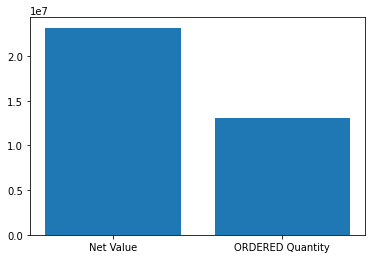

In [38]:
plt.bar(sum_ordered_spend_and_number_orders_per_year.columns[1:], [sum_ordered_spend_and_number_orders_per_year.iloc[1]["Net Value"], sum_ordered_spend_and_number_orders_per_year.iloc[1]["ORDERED Quantity"]])

Text(0.5, 0, 'Year')

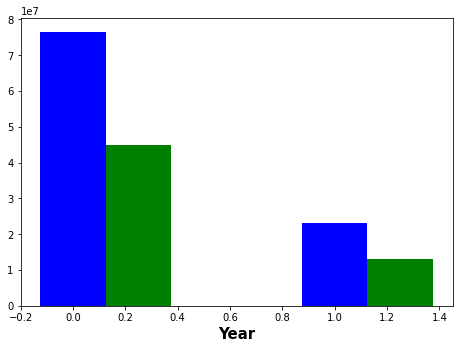

In [39]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, sum_ordered_spend_and_number_orders_per_year["Net Value"], color = 'b', width = 0.25, label = "2019")
ax.bar(X + 0.25, sum_ordered_spend_and_number_orders_per_year["ORDERED Quantity"], color = 'g', width = 0.25, label = "2020")
plt.xlabel('Year', fontweight ='bold', fontsize = 15)

Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach Monaten
im Vergleich zum Vorjahr:

In [40]:
sum_ordered_spend_and_number_orders_per_month = data.groupby(["Month"])[["Net Value", "ORDERED Quantity"]].sum().reset_index()

In [41]:
sum_ordered_spend_and_number_orders_per_month

,Month,Net Value,ORDERED Quantity
0,1,4.812446e+06,2220482.25
1,2,4.483554e+07,29259937.98
2,3,3.352357e+06,1784838.00
3,4,9.474808e+06,5151510.30
4,5,3.080411e+06,1866670.00
5,6,2.199279e+06,1383485.50
6,7,3.008581e+06,1731383.80
7,8,3.556269e+06,1575867.00
8,9,7.671278e+06,3648939.38
9,10,5.528378e+06,3568777.20


Ordered Spend & Anzahl Bestellungen im aktuellen Jahr (YTD) nach
Einkaufsorganisation im Vergleich zum Vorjahr

In [18]:
sum_ordered_spend_and_number_orders_per_purchasingOrg = data.groupby(["Purchasing Org."])[["Net Value", "ORDERED Quantity"]].sum().reset_index()

In [19]:
sum_ordered_spend_and_number_orders_per_purchasingOrg

,Purchasing Org.,Net Value,ORDERED Quantity
0,54,1.410867e+06,4980.00
1,5200,3.150065e+06,5200.00
2,5210,1.134735e+06,2478.00
3,5310,1.348624e+04,248.00
4,5320,1.990796e+04,318.00
5,5400,5.959146e+07,37784119.98
6,5410,3.414602e+07,20061025.98
7,5420,3.108341e+05,254670.00


In [20]:
v = data.groupby(["Year","Supplier name"])[["Net Value"]].sum().reset_index().sort_values(by = "Net Value",  ascending=False)


In [21]:
v


,Year,Supplier name,Net Value
36,2019,ETELIERS DE LE HEUTE-GERU,21244885.45
176,2020,ETELIERS DE LE HEUTE-GERU,14487155.87
69,2019,LISI EERUSPECE,9124664.70
54,2019,HUMET FESTENING SYSTEMS,7548801.98
35,2019,ESPE HUTCHINSUN EERUSPECE,7423616.00
...,...,...,...
65,2019,LETECUERE,3.00
159,2020,DMV GMBH,3.00
116,2019,STELIE EERUSPECE CUMPUSIT,1.11
233,2020,SCHMITZ GMBH,1.00


In [22]:
top_10_2019 = v[v["Year"] ==2019].head(10)
top_10_2020 = v[v["Year"] ==2020].head(10)

In [23]:
top_10_2019


,Year,Supplier name,Net Value
36,2019,ETELIERS DE LE HEUTE-GERU,21244885.45
69,2019,LISI EERUSPECE,9124664.70
54,2019,HUMET FESTENING SYSTEMS,7548801.98
35,2019,ESPE HUTCHINSUN EERUSPECE,7423616.00
105,2019,SCHULZE GMBH,3025298.13
107,2019,SEFREN CEBIN FRENCE,3003709.41
2,2019,ALB GMBH,2368218.45
95,2019,PREMIUM GMBH,2014186.10
38,2019,EVIETIN LEUPHEIM GMBH,1823458.72
106,2019,SEEB EB (PUPL),1706573.16
